# IMPORTS


In [34]:
from utils import *
from sklearn.model_selection import train_test_split
from tabulate import tabulate
import matplotlib.pyplot as plt

from pyspark.ml.feature import OneHotEncoder
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer

## 1- Read Dataset


In [35]:
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Uncomment to read the dataset online


In [36]:

#!pip install ucimlrepo
# from ucimlrepo import fetch_ucirepo

# # fetch dataset
# phiusiil_phishing_url_website = fetch_ucirepo(id=967)

# # data (as pandas dataframes)
# X = phiusiil_phishing_url_website.data.features
# y = phiusiil_phishing_url_website.data.targets

# # metadata
# print(phiusiil_phishing_url_website.metadata)

# # variable information
# print(phiusiil_phishing_url_website.variables)

## 2- Preprocessing & Visualization


In [37]:
# load the dataset
DATASET_PATH = "./dataset/PhiUSIIL_Phishing_URL_Dataset.csv"

In [38]:
# find spark
spark = SparkSession.builder.appName("PhishingURL").getOrCreate()
sc = spark.sparkContext

In [39]:
# read dataset
phishing_rdd = spark.read.csv(DATASET_PATH, header=True, inferSchema=True)

In [40]:
# show rdd header and first 10 rows
phishing_rdd.show(10)

+----------+--------------------+---------+--------------------+------------+----------+---+------------------+--------------------+-----------------+-----------+---------+-------------+--------------+------------------+----------------+----------------+----------------+---------------+---------------+---------------+--------------+------------------+--------------------------+---------------------+-------+----------+-----------------+--------+--------------------+---------------------+------------------+----------+------+------------+---------------+----------------+--------------+---------+----------+---------------------+------------+---------------+---------------+----------------+----+---+------+----------------+---------+-------+------+-----------+------------+---------------+-----+
|  FILENAME|                 URL|URLLength|              Domain|DomainLength|IsDomainIP|TLD|URLSimilarityIndex|CharContinuationRate|TLDLegitimateProb|URLCharProb|TLDLength|NoOfSubDomain|HasObfuscation

In [41]:
# drop filename column since it's not relevant
phishing_rdd = phishing_rdd.drop("filename")

In [42]:
# show rows, columns, and schema
print("Rows: ", phishing_rdd.count())
print("Columns: ", len(phishing_rdd.columns))
print("Schema: ", phishing_rdd.printSchema())

Rows:  235795
Columns:  55
root
 |-- URL: string (nullable = true)
 |-- URLLength: integer (nullable = true)
 |-- Domain: string (nullable = true)
 |-- DomainLength: integer (nullable = true)
 |-- IsDomainIP: integer (nullable = true)
 |-- TLD: string (nullable = true)
 |-- URLSimilarityIndex: double (nullable = true)
 |-- CharContinuationRate: double (nullable = true)
 |-- TLDLegitimateProb: double (nullable = true)
 |-- URLCharProb: double (nullable = true)
 |-- TLDLength: integer (nullable = true)
 |-- NoOfSubDomain: integer (nullable = true)
 |-- HasObfuscation: integer (nullable = true)
 |-- NoOfObfuscatedChar: integer (nullable = true)
 |-- ObfuscationRatio: double (nullable = true)
 |-- NoOfLettersInURL: integer (nullable = true)
 |-- LetterRatioInURL: double (nullable = true)
 |-- NoOfDegitsInURL: integer (nullable = true)
 |-- DegitRatioInURL: double (nullable = true)
 |-- NoOfEqualsInURL: integer (nullable = true)
 |-- NoOfQMarkInURL: integer (nullable = true)
 |-- NoOfAmpers

In [43]:
# show rows, columns, and schema
print("Rows: ", phishing_rdd.count())
print("Columns: ", len(phishing_rdd.columns))
print("Schema: ", phishing_rdd.printSchema())

Rows:  235795
Columns:  55
root
 |-- URL: string (nullable = true)
 |-- URLLength: integer (nullable = true)
 |-- Domain: string (nullable = true)
 |-- DomainLength: integer (nullable = true)
 |-- IsDomainIP: integer (nullable = true)
 |-- TLD: string (nullable = true)
 |-- URLSimilarityIndex: double (nullable = true)
 |-- CharContinuationRate: double (nullable = true)
 |-- TLDLegitimateProb: double (nullable = true)
 |-- URLCharProb: double (nullable = true)
 |-- TLDLength: integer (nullable = true)
 |-- NoOfSubDomain: integer (nullable = true)
 |-- HasObfuscation: integer (nullable = true)
 |-- NoOfObfuscatedChar: integer (nullable = true)
 |-- ObfuscationRatio: double (nullable = true)
 |-- NoOfLettersInURL: integer (nullable = true)
 |-- LetterRatioInURL: double (nullable = true)
 |-- NoOfDegitsInURL: integer (nullable = true)
 |-- DegitRatioInURL: double (nullable = true)
 |-- NoOfEqualsInURL: integer (nullable = true)
 |-- NoOfQMarkInURL: integer (nullable = true)
 |-- NoOfAmpers

In [44]:
# show rows, columns, and schema
print("Rows: ", phishing_rdd.count())
print("Columns: ", len(phishing_rdd.columns))
print("Schema: ", phishing_rdd.printSchema())

Rows:  235795
Columns:  55
root
 |-- URL: string (nullable = true)
 |-- URLLength: integer (nullable = true)
 |-- Domain: string (nullable = true)
 |-- DomainLength: integer (nullable = true)
 |-- IsDomainIP: integer (nullable = true)
 |-- TLD: string (nullable = true)
 |-- URLSimilarityIndex: double (nullable = true)
 |-- CharContinuationRate: double (nullable = true)
 |-- TLDLegitimateProb: double (nullable = true)
 |-- URLCharProb: double (nullable = true)
 |-- TLDLength: integer (nullable = true)
 |-- NoOfSubDomain: integer (nullable = true)
 |-- HasObfuscation: integer (nullable = true)
 |-- NoOfObfuscatedChar: integer (nullable = true)
 |-- ObfuscationRatio: double (nullable = true)
 |-- NoOfLettersInURL: integer (nullable = true)
 |-- LetterRatioInURL: double (nullable = true)
 |-- NoOfDegitsInURL: integer (nullable = true)
 |-- DegitRatioInURL: double (nullable = true)
 |-- NoOfEqualsInURL: integer (nullable = true)
 |-- NoOfQMarkInURL: integer (nullable = true)
 |-- NoOfAmpers

In [45]:
# show rows, columns, and schema
print("Rows: ", phishing_rdd.count())
print("Columns: ", len(phishing_rdd.columns))
print("Schema: ", phishing_rdd.printSchema())

Rows:  235795
Columns:  55
root
 |-- URL: string (nullable = true)
 |-- URLLength: integer (nullable = true)
 |-- Domain: string (nullable = true)
 |-- DomainLength: integer (nullable = true)
 |-- IsDomainIP: integer (nullable = true)
 |-- TLD: string (nullable = true)
 |-- URLSimilarityIndex: double (nullable = true)
 |-- CharContinuationRate: double (nullable = true)
 |-- TLDLegitimateProb: double (nullable = true)
 |-- URLCharProb: double (nullable = true)
 |-- TLDLength: integer (nullable = true)
 |-- NoOfSubDomain: integer (nullable = true)
 |-- HasObfuscation: integer (nullable = true)
 |-- NoOfObfuscatedChar: integer (nullable = true)
 |-- ObfuscationRatio: double (nullable = true)
 |-- NoOfLettersInURL: integer (nullable = true)
 |-- LetterRatioInURL: double (nullable = true)
 |-- NoOfDegitsInURL: integer (nullable = true)
 |-- DegitRatioInURL: double (nullable = true)
 |-- NoOfEqualsInURL: integer (nullable = true)
 |-- NoOfQMarkInURL: integer (nullable = true)
 |-- NoOfAmpers

In [46]:
# columns to be used for visualization

hist_columns = ["URLLength",  # integer
                "URLSimilarityIndex",  # : double
                "CharContinuationRate",  # : double
                "TLDLegitimateProb",  # : double
                "URLCharProb",  # : double
                "NoOfSubDomain",  # : integer
                "LetterRatioInURL",  # : double
                "DegitRatioInURL",  # : double
                "SpacialCharRatioInURL",  # : double
                "LineOfCode",  # num of html lines : integer
                "LargestLineLength",  # : integer
                "URLTitleMatchScore",  # : double
                "NoOfURLRedirect",  # integer
                "NoOfSelfRedirect",  # integer
                "NoOfPopup",  # : integer
                "NoOfiFrame",  # : integer
                "NoOfImage",  # : integer
                "NoOfCSS",  # : integer
                "NoOfJS",  # : integer
                "NoOfSelfRef",  # : integer
                "NoOfEmptyRef",  # : integer
                "NoOfExternalRef",  # : integer
                ]

binary_columns = ["IsHTTPS",
                  "HasTitle",
                  "HasFavicon",
                  "Robots",
                  "IsResponsive",
                  "HasDescription",
                  "HasExternalFormSubmit",
                  "HasSocialNet",
                  "HasSubmitButton",
                  "HasHiddenFields",
                  "HasPasswordField",
                  "Bank",
                  "Pay",
                  "Crypto",
                  "HasCopyrightInfo",
                  ]


print("Histograms length: ", len(hist_columns))
print("Binary columns length: ", len(binary_columns))

Histograms length:  22
Binary columns length:  15


In [47]:
# check the number of missing values in each column
print("Missing values: ")
for col in phishing_rdd.columns:
    print(col, ":", phishing_rdd.where(phishing_rdd[col].isNull()).count())

Missing values: 
URL : 0
URLLength : 0
Domain : 0
DomainLength : 0
IsDomainIP : 0
TLD : 0
URLSimilarityIndex : 0
CharContinuationRate : 0
TLDLegitimateProb : 0
URLCharProb : 0
TLDLength : 0
NoOfSubDomain : 0
HasObfuscation : 0
NoOfObfuscatedChar : 0
ObfuscationRatio : 0
NoOfLettersInURL : 0
LetterRatioInURL : 0
NoOfDegitsInURL : 0
DegitRatioInURL : 0
NoOfEqualsInURL : 0
NoOfQMarkInURL : 0
NoOfAmpersandInURL : 0
NoOfOtherSpecialCharsInURL : 0
SpacialCharRatioInURL : 0
IsHTTPS : 0
LineOfCode : 0
LargestLineLength : 0
HasTitle : 0
Title : 0
DomainTitleMatchScore : 0
URLTitleMatchScore : 0
HasFavicon : 0
Robots : 0
IsResponsive : 0
NoOfURLRedirect : 0
NoOfSelfRedirect : 0
HasDescription : 0
NoOfPopup : 0
NoOfiFrame : 0
HasExternalFormSubmit : 0
HasSocialNet : 0
HasSubmitButton : 0
HasHiddenFields : 0
HasPasswordField : 0
Bank : 0
Pay : 0
Crypto : 0
HasCopyrightInfo : 0
NoOfImage : 0
NoOfCSS : 0
NoOfJS : 0
NoOfSelfRef : 0
NoOfEmptyRef : 0
NoOfExternalRef : 0
label : 0


In [48]:
# keep thee unique values of the url column
unique_urls = phishing_rdd.select("url").distinct()
print("Unique URLs: ", unique_urls.count())
filtered_rdd = phishing_rdd.dropDuplicates(["url"])

Unique URLs:  235370


In [49]:
# drop NON-informative columns
filtered_rdd = filtered_rdd.drop("Domain")
filtered_rdd = filtered_rdd.drop("DomainLength")
filtered_rdd = filtered_rdd.drop("IsDomainIP")
filtered_rdd = filtered_rdd.drop("HasObfuscation")
filtered_rdd = filtered_rdd.drop("NoOfObfuscatedChar")
filtered_rdd = filtered_rdd.drop("ObfuscationRatio")
filtered_rdd = filtered_rdd.drop("Title")

In [50]:
print(filtered_rdd.count())
filtered_rdd.columns

235370


['URL',
 'URLLength',
 'TLD',
 'URLSimilarityIndex',
 'CharContinuationRate',
 'TLDLegitimateProb',
 'URLCharProb',
 'TLDLength',
 'NoOfSubDomain',
 'NoOfLettersInURL',
 'LetterRatioInURL',
 'NoOfDegitsInURL',
 'DegitRatioInURL',
 'NoOfEqualsInURL',
 'NoOfQMarkInURL',
 'NoOfAmpersandInURL',
 'NoOfOtherSpecialCharsInURL',
 'SpacialCharRatioInURL',
 'IsHTTPS',
 'LineOfCode',
 'LargestLineLength',
 'HasTitle',
 'DomainTitleMatchScore',
 'URLTitleMatchScore',
 'HasFavicon',
 'Robots',
 'IsResponsive',
 'NoOfURLRedirect',
 'NoOfSelfRedirect',
 'HasDescription',
 'NoOfPopup',
 'NoOfiFrame',
 'HasExternalFormSubmit',
 'HasSocialNet',
 'HasSubmitButton',
 'HasHiddenFields',
 'HasPasswordField',
 'Bank',
 'Pay',
 'Crypto',
 'HasCopyrightInfo',
 'NoOfImage',
 'NoOfCSS',
 'NoOfJS',
 'NoOfSelfRef',
 'NoOfEmptyRef',
 'NoOfExternalRef',
 'label']

In [51]:
# one HOT Encoding for categorial feauters

# Indexing the categorical column
string_indexer = StringIndexer(inputCol="TLD", outputCol="TLD" + "_index")

# Applying one-hot encoding
encoder = OneHotEncoder(
    inputCols=["TLD" + "_index"], outputCols=["TLD_Encoded"])

# Define the pipeline
pipeline = Pipeline(stages=[string_indexer, encoder])

# Fit the pipeline to the data
pipeline_model = pipeline.fit(filtered_rdd)

# Transform the data
df_encoded = pipeline_model.transform(filtered_rdd)

print(df_encoded.count())

# Show the result
df_encoded.show(10)

235370
+--------------------+---------+---+------------------+--------------------+-----------------+-----------+---------+-------------+----------------+----------------+---------------+---------------+---------------+--------------+------------------+--------------------------+---------------------+-------+----------+-----------------+--------+---------------------+------------------+----------+------+------------+---------------+----------------+--------------+---------+----------+---------------------+------------+---------------+---------------+----------------+----+---+------+----------------+---------+-------+------+-----------+------------+---------------+-----+---------+-----------------+
|                 URL|URLLength|TLD|URLSimilarityIndex|CharContinuationRate|TLDLegitimateProb|URLCharProb|TLDLength|NoOfSubDomain|NoOfLettersInURL|LetterRatioInURL|NoOfDegitsInURL|DegitRatioInURL|NoOfEqualsInURL|NoOfQMarkInURL|NoOfAmpersandInURL|NoOfOtherSpecialCharsInURL|SpacialCharRatioInUR

data Spiliting


In [52]:
df_train, df_test = df_encoded.randomSplit([0.75, 0.25], seed=42)

# generate descriptive statistics

filtered_rdd.describe().show()


In [53]:
# split the dataset into the rows that are real and phishing based on the label column
# where 1 is phishing and 0 is real
all_legitimate_rdd = filtered_rdd.where(filtered_rdd["label"] == 1)
all_phishing_rdd = filtered_rdd.where(filtered_rdd["label"] == 0)

In [54]:
# show the number of the legitimate and phishing URLs
print("Legitimate URLs: ", all_legitimate_rdd.count())
print("Phishing URLs: ", all_phishing_rdd.count())

Legitimate URLs:  134850
Phishing URLs:  100520


In [55]:
# # show histograms for integer columns in the dataset to understand the distribution of the data


# # convert the rdd to a pandas dataframe
# phishing_df = phishing_rdd.toPandas()

# # plot histograms for integer columns
# for col in phishing_df.select_dtypes(include=["int"]).columns:
#     sns.histplot(phishing_df[col])
#     plt.title(col)
#     plt.show()

In [56]:
# Compute descriptive statistics for numeric columns
numeric_cols = [col for col, dtype in df_train.dtypes if dtype ==
                'int' or dtype == 'double']
numeric_stats = df_train.select(numeric_cols).describe().toPandas()

print(numeric_stats)

  summary          URLLength  URLSimilarityIndex CharContinuationRate  \
0   count             177041              177041               177041   
1    mean  34.46899870651431   78.51084209214075   0.8460794072893132   
2  stddev  36.86756887827503  28.937714102963263  0.21637206310256016   
3     min                 13         0.304877307                  0.0   
4     max               4274               100.0                  1.0   

     TLDLegitimateProb           URLCharProb           TLDLength  \
0               177041                177041              177041   
1   0.2604285895306641   0.05576824888296493   2.764749408329144   
2  0.25162394208136274  0.010580574285191286  0.6014980174901869   
3                  0.0           0.001082764                   2   
4            0.5229071           0.090680686                  13   

        NoOfSubDomain    NoOfLettersInURL     LetterRatioInURL  ...  \
0              177041              177041               177041  ...   
1  1.16493

In [57]:

#

# sample_data=df_train.sample(fraction=0.1,seed=42)
# pandas_df = df_train.toPandas()

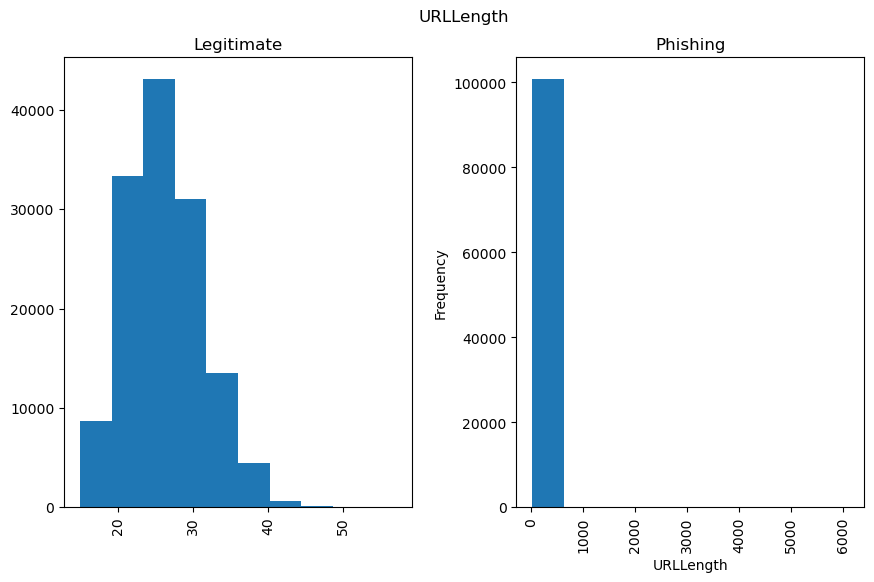

+-------------+---------+---------+----------+-------+-------+-------+-------+-------+
| LabelName   |   count |    mean |      std |   min |   25% |   50% |   75% |   max |
|-------------+---------+---------+----------+-------+-------+-------+-------+-------|
| Legitimate  |  134850 | 26.2286 |  4.81561 |    15 |    23 |    26 |    29 |    57 |
| Phishing    |  100945 | 45.7203 | 61.1455  |    13 |    26 |    34 |    48 |  6097 |
+-------------+---------+---------+----------+-------+-------+-------+-------+-------+


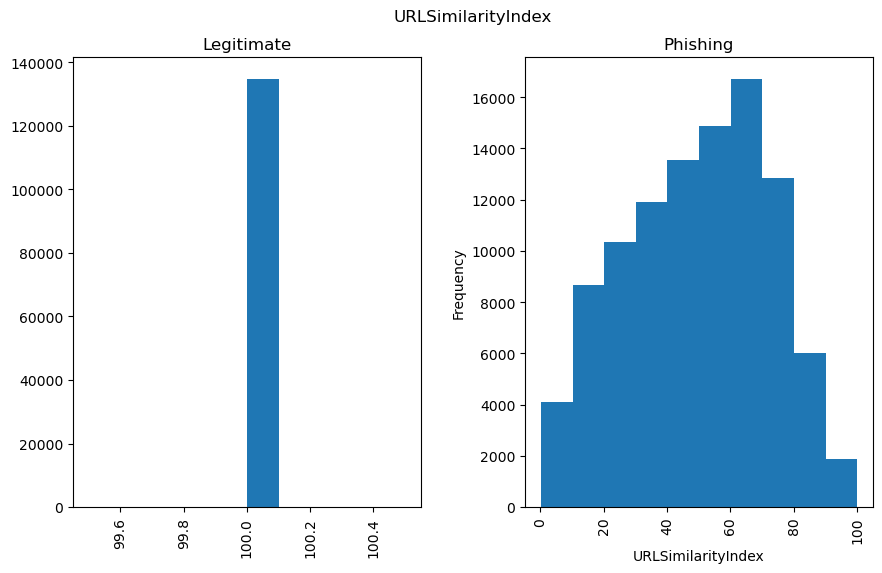

+-------------+---------+---------+---------+------------+----------+----------+----------+-------+
| LabelName   |   count |    mean |     std |        min |      25% |      50% |      75% |   max |
|-------------+---------+---------+---------+------------+----------+----------+----------+-------|
| Legitimate  |  134850 | 100     |  0      | 100        | 100      | 100      | 100      |   100 |
| Phishing    |  100945 |  49.617 | 22.5721 |   0.155574 |  32.1206 |  51.4193 |  67.2515 |   100 |
+-------------+---------+---------+---------+------------+----------+----------+----------+-------+


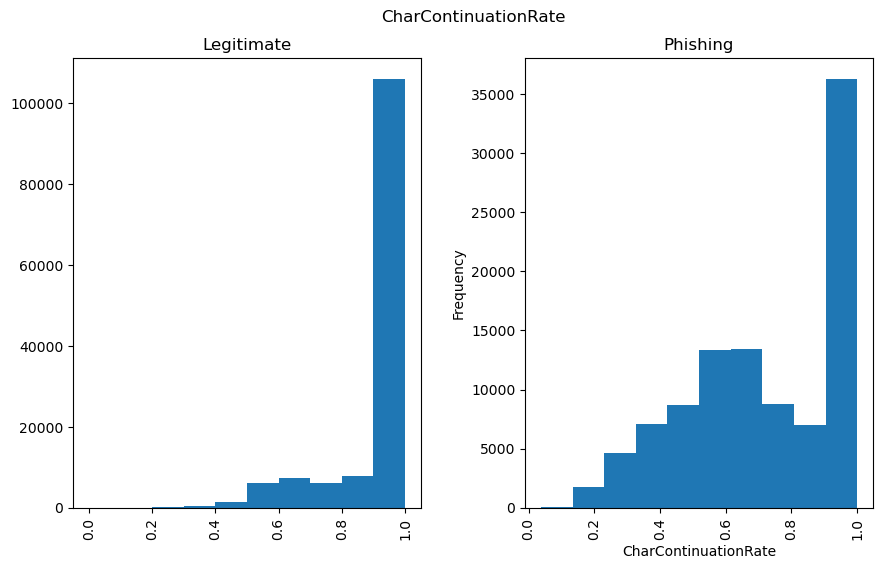

+-------------+---------+----------+----------+-----------+----------+----------+-------+-------+
| LabelName   |   count |     mean |      std |       min |      25% |      50% |   75% |   max |
|-------------+---------+----------+----------+-----------+----------+----------+-------+-------|
| Legitimate  |  134850 | 0.933176 | 0.139818 | 0         | 1        | 1        |     1 |     1 |
| Phishing    |  100945 | 0.728395 | 0.243976 | 0.0377358 | 0.545455 | 0.727273 |     1 |     1 |
+-------------+---------+----------+----------+-----------+----------+----------+-------+-------+


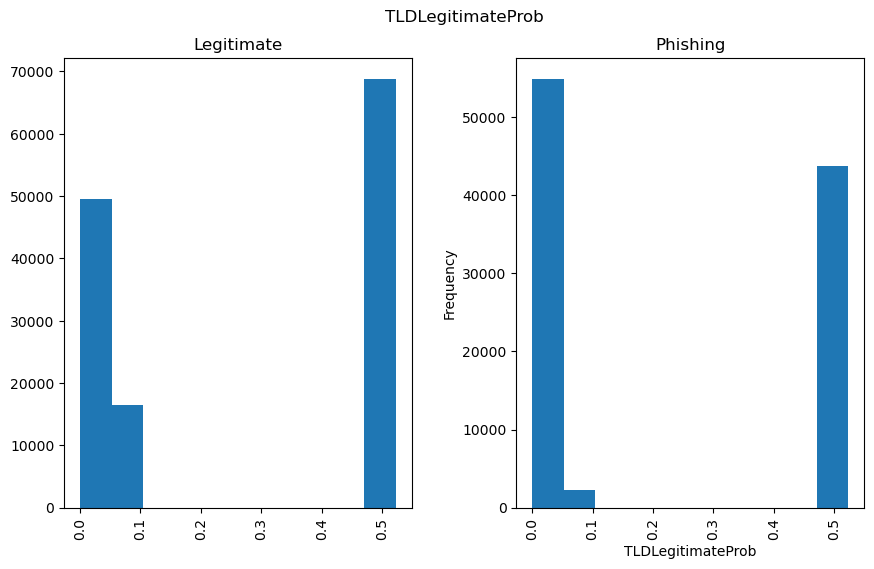

+-------------+---------+----------+----------+-------+-----------+-----------+----------+----------+
| LabelName   |   count |     mean |      std |   min |       25% |       50% |      75% |      max |
|-------------+---------+----------+----------+-------+-----------+-----------+----------+----------|
| Legitimate  |  134850 | 0.281625 | 0.247132 | 6e-07 | 0.0180132 | 0.522907  | 0.522907 | 0.522907 |
| Phishing    |  100945 | 0.232099 | 0.254775 | 0     | 0.001502  | 0.0180132 | 0.522907 | 0.522907 |
+-------------+---------+----------+----------+-------+-----------+-----------+----------+----------+


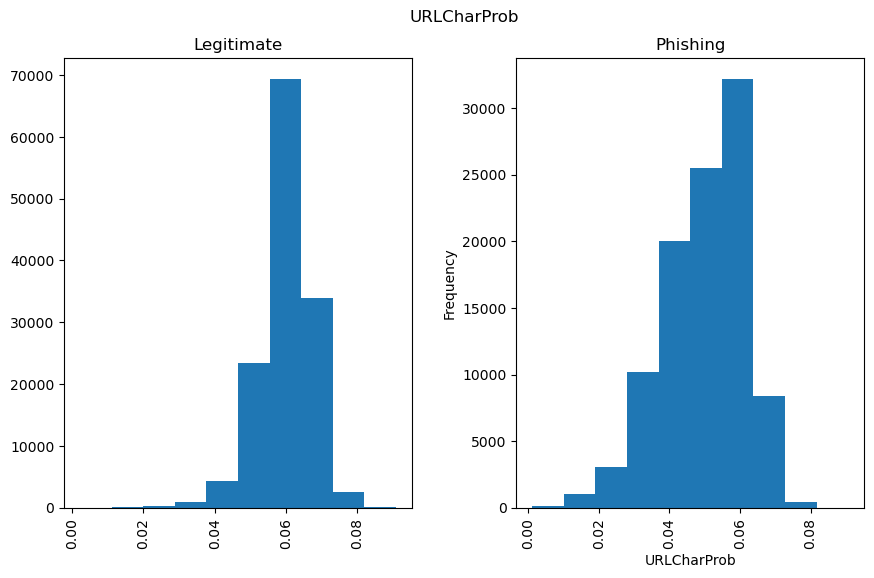

+-------------+---------+-----------+------------+------------+-----------+-----------+-----------+-----------+
| LabelName   |   count |      mean |        std |        min |       25% |       50% |       75% |       max |
|-------------+---------+-----------+------------+------------+-----------+-----------+-----------+-----------|
| Legitimate  |  134850 | 0.0600501 | 0.00717056 | 0.00225882 | 0.0562455 | 0.060628  | 0.0646593 | 0.0908237 |
| Phishing    |  100945 | 0.0499992 | 0.0116344  | 0.00108276 | 0.0420743 | 0.0520227 | 0.0587438 | 0.0906807 |
+-------------+---------+-----------+------------+------------+-----------+-----------+-----------+-----------+


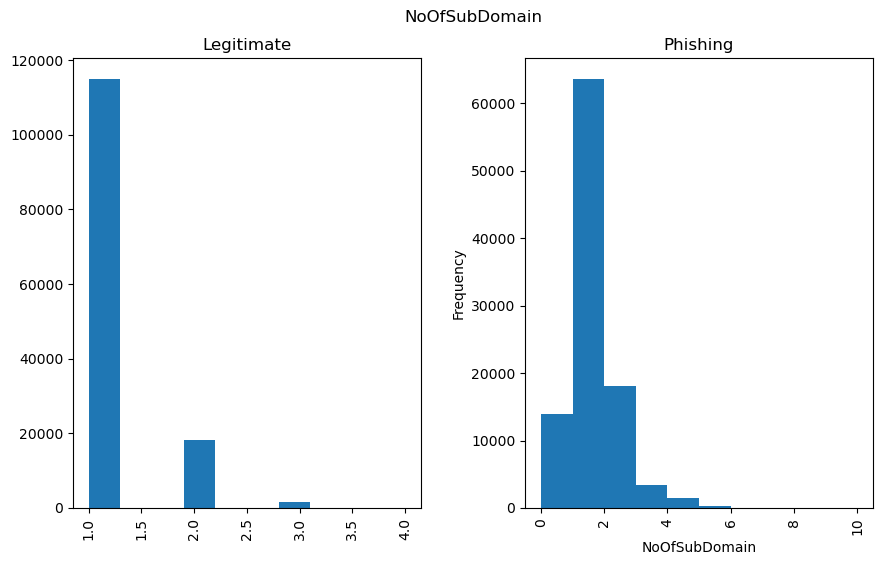

+-------------+---------+---------+----------+-------+-------+-------+-------+-------+
| LabelName   |   count |    mean |      std |   min |   25% |   50% |   75% |   max |
|-------------+---------+---------+----------+-------+-------+-------+-------+-------|
| Legitimate  |  134850 | 1.16166 | 0.404076 |     1 |     1 |     1 |     1 |     4 |
| Phishing    |  100945 | 1.16889 | 0.79088  |     0 |     1 |     1 |     1 |    10 |
+-------------+---------+---------+----------+-------+-------+-------+-------+-------+


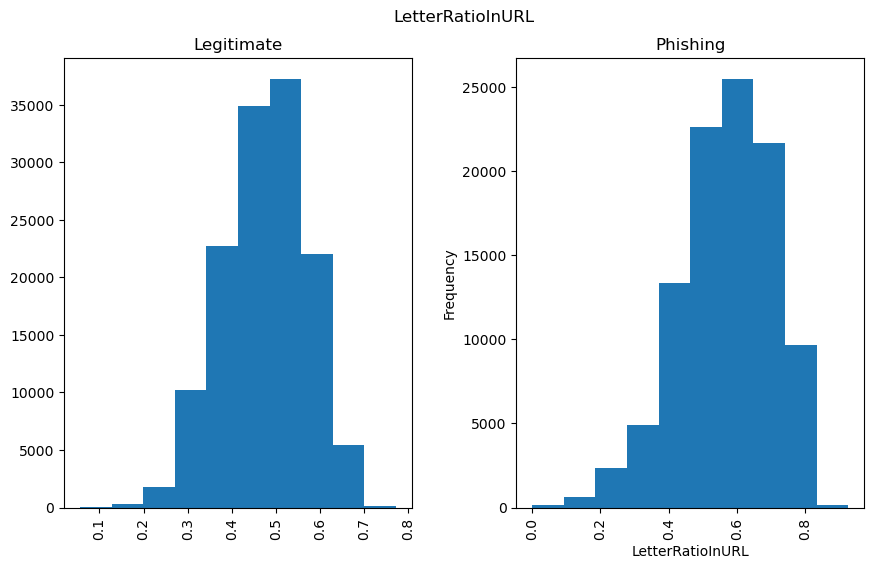

+-------------+---------+----------+-----------+-------+-------+-------+-------+-------+
| LabelName   |   count |     mean |       std |   min |   25% |   50% |   75% |   max |
|-------------+---------+----------+-----------+-------+-------+-------+-------+-------|
| Legitimate  |  134850 | 0.476705 | 0.0951665 | 0.056 | 0.409 | 0.48  | 0.552 | 0.772 |
| Phishing    |  100945 | 0.568366 | 0.136445  | 0     | 0.478 | 0.577 | 0.676 | 0.926 |
+-------------+---------+----------+-----------+-------+-------+-------+-------+-------+


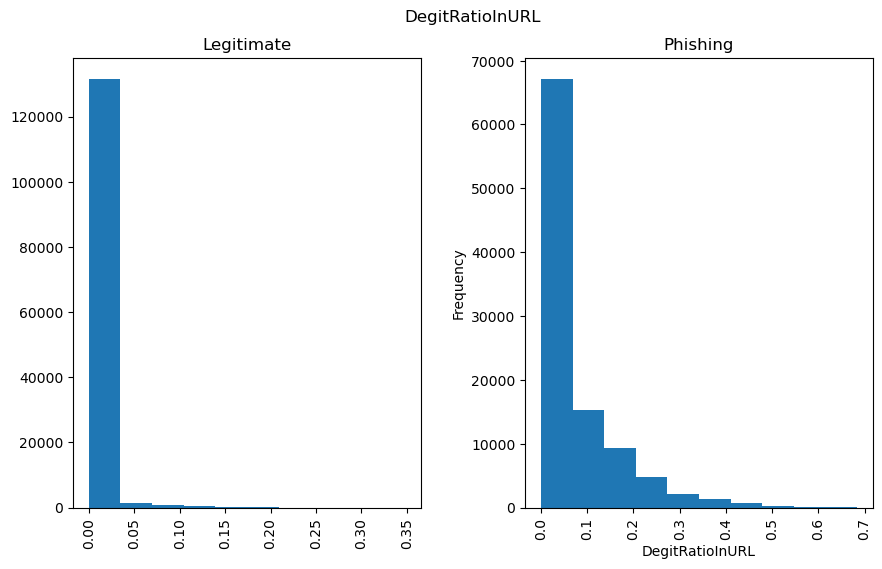

+-------------+---------+------------+-----------+-------+-------+-------+-------+-------+
| LabelName   |   count |       mean |       std |   min |   25% |   50% |   75% |   max |
|-------------+---------+------------+-----------+-------+-------+-------+-------+-------|
| Legitimate  |  134850 | 0.00211519 | 0.0146816 |     0 |     0 |     0 | 0     | 0.348 |
| Phishing    |  100945 | 0.0640182  | 0.0962378 |     0 |     0 |     0 | 0.102 | 0.684 |
+-------------+---------+------------+-----------+-------+-------+-------+-------+-------+


+-------------+---------+-----------+-----------+-------+-------+-------+-------+-------+
| LabelName   |   count |      mean |       std |   min |   25% |   50% |   75% |   max |
|-------------+---------+-----------+-----------+-------+-------+-------+-------+-------|
| Legitimate  |  134850 | 0.0483563 | 0.0190305 | 0     | 0.036 | 0.042 | 0.053 | 0.231 |
| Phishing    |  100945 | 0.0832849 | 0.0356306 | 0.005 | 0.051 | 0.08  | 0.111 | 0.397 |
+-------------+---------+-----------+-----------+-------+-------+-------+-------+-------+


+-------------+---------+-----------+----------+-------+-------+-------+-------+--------+
| LabelName   |   count |      mean |      std |   min |   25% |   50% |   75% |    max |
|-------------+---------+-----------+----------+-------+-------+-------+-------+--------|
| Legitimate  |  134850 | 1947.49   | 4348.2   |   102 |   613 |  1105 |  2088 | 442666 |
| Phishing    |  100945 |   65.7305 |  195.918 |     2 |     2 |    12 |    90 |  29687 |
+-------------+---------+-----------+----------+-------+-------+-------+-------+--------+


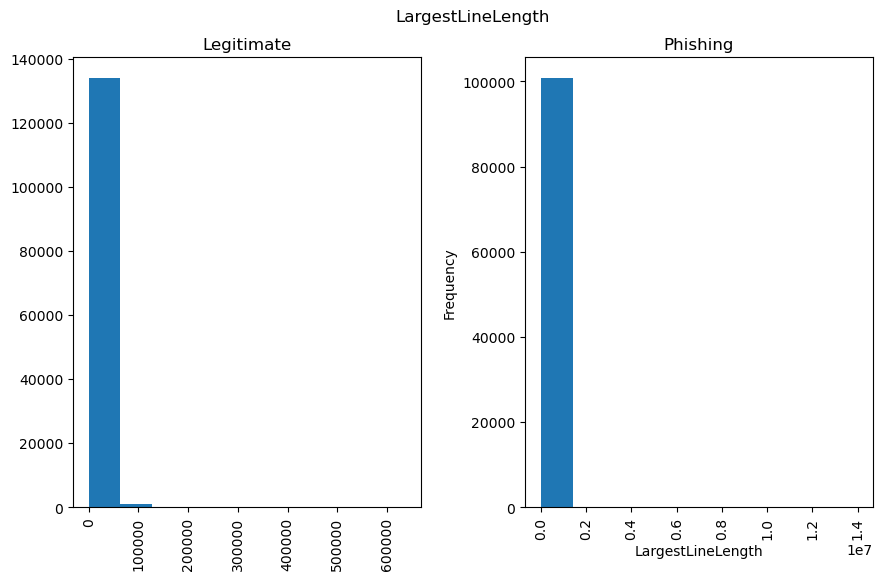

+-------------+---------+----------+----------+-------+-------+-------+-------+------------------+
| LabelName   |   count |     mean |      std |   min |   25% |   50% |   75% |              max |
|-------------+---------+----------+----------+-------+-------+-------+-------+------------------|
| Legitimate  |  134850 |  7375.92 |  12778.2 |    84 |   875 |  3066 |  9381 | 636010           |
| Phishing    |  100945 | 20021.4  | 231952   |    22 |    59 |   138 |   869 |      1.39757e+07 |
+-------------+---------+----------+----------+-------+-------+-------+-------+------------------+


+-------------+---------+---------+---------+-------+---------+-------+-----------+-------+
| LabelName   |   count |    mean |     std |   min |     25% |   50% |       75% |   max |
|-------------+---------+---------+---------+-------+---------+-------+-----------+-------|
| Legitimate  |  134850 | 75.2709 | 42.6828 |     0 | 77.7778 |   100 | 100       |   100 |
| Phishing    |  100945 | 21.1982 | 40.508  |     0 |  0      |     0 |   1.31579 |   100 |
+-------------+---------+---------+---------+-------+---------+-------+-----------+-------+


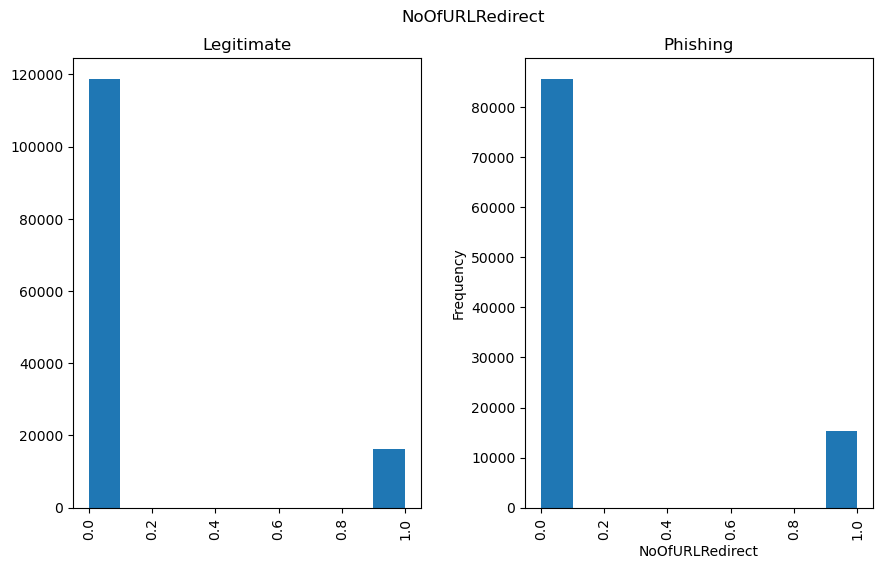

+-------------+---------+----------+----------+-------+-------+-------+-------+-------+
| LabelName   |   count |     mean |      std |   min |   25% |   50% |   75% |   max |
|-------------+---------+----------+----------+-------+-------+-------+-------+-------|
| Legitimate  |  134850 | 0.11977  | 0.324694 |     0 |     0 |     0 |     0 |     1 |
| Phishing    |  100945 | 0.151696 | 0.358728 |     0 |     0 |     0 |     0 |     1 |
+-------------+---------+----------+----------+-------+-------+-------+-------+-------+


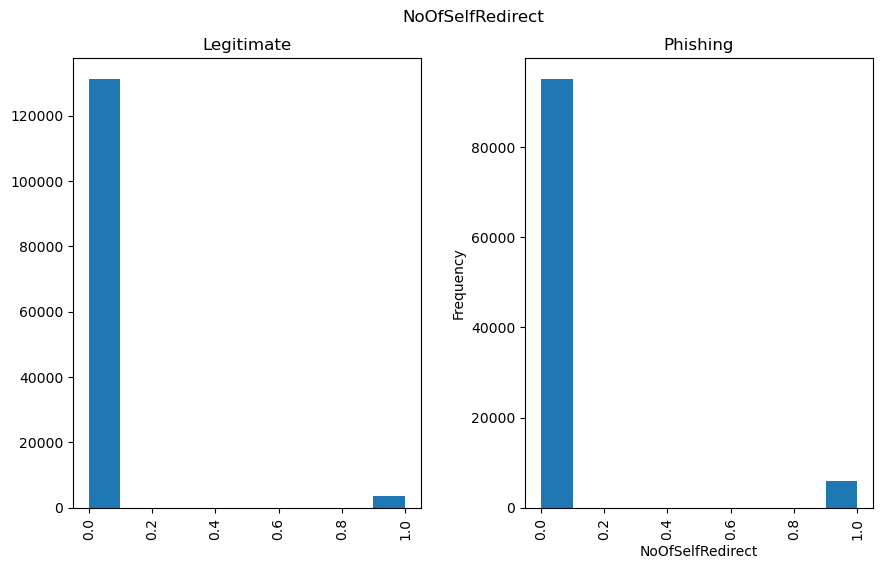

+-------------+---------+-----------+----------+-------+-------+-------+-------+-------+
| LabelName   |   count |      mean |      std |   min |   25% |   50% |   75% |   max |
|-------------+---------+-----------+----------+-------+-------+-------+-------+-------|
| Legitimate  |  134850 | 0.0271264 | 0.162452 |     0 |     0 |     0 |     0 |     1 |
| Phishing    |  100945 | 0.0574471 | 0.232696 |     0 |     0 |     0 |     0 |     1 |
+-------------+---------+-----------+----------+-------+-------+-------+-------+-------+


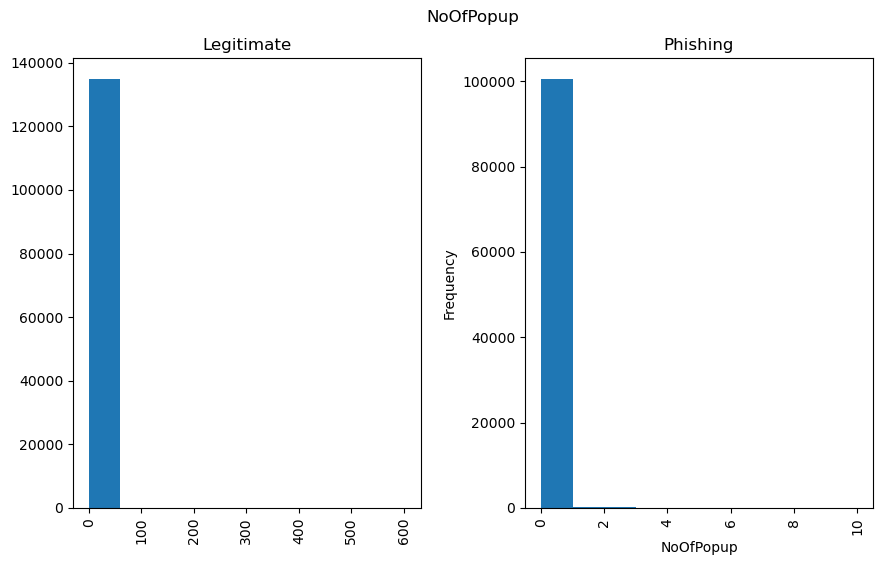

+-------------+---------+------------+----------+-------+-------+-------+-------+-------+
| LabelName   |   count |       mean |      std |   min |   25% |   50% |   75% |   max |
|-------------+---------+------------+----------+-------+-------+-------+-------+-------|
| Legitimate  |  134850 | 0.380467   | 5.11022  |     0 |     0 |     0 |     0 |   602 |
| Phishing    |  100945 | 0.00975779 | 0.173007 |     0 |     0 |     0 |     0 |    10 |
+-------------+---------+------------+----------+-------+-------+-------+-------+-------+


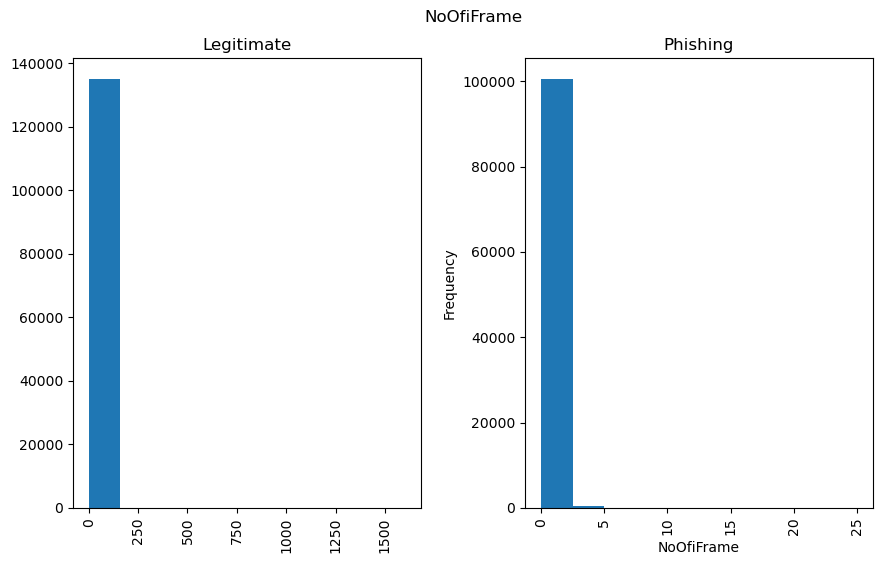

+-------------+---------+-----------+----------+-------+-------+-------+-------+-------+
| LabelName   |   count |      mean |      std |   min |   25% |   50% |   75% |   max |
|-------------+---------+-----------+----------+-------+-------+-------+-------+-------|
| Legitimate  |  134850 | 2.71453   | 7.4096   |     0 |     0 |     1 |     3 |  1602 |
| Phishing    |  100945 | 0.0845807 | 0.519529 |     0 |     0 |     0 |     0 |    25 |
+-------------+---------+-----------+----------+-------+-------+-------+-------+-------+


+-------------+---------+-----------+----------+-------+-------+-------+-------+-------+
| LabelName   |   count |      mean |      std |   min |   25% |   50% |   75% |   max |
|-------------+---------+-----------+----------+-------+-------+-------+-------+-------|
| Legitimate  |  134850 | 44.9466   | 100.931  |     0 |    13 |    25 |    47 |  8956 |
| Phishing    |  100945 |  0.866492 |   3.2965 |     0 |     0 |     0 |     0 |   158 |
+-------------+---------+-----------+----------+-------+-------+-------+-------+-------+


+-------------+---------+-----------+----------+-------+-------+-------+-------+-------+
| LabelName   |   count |      mean |      std |   min |   25% |   50% |   75% |   max |
|-------------+---------+-----------+----------+-------+-------+-------+-------+-------|
| Legitimate  |  134850 | 10.7448   | 98.7608  |     0 |     3 |     6 |    13 | 35820 |
| Phishing    |  100945 |  0.439616 |  1.43878 |     0 |     0 |     0 |     0 |   131 |
+-------------+---------+-----------+----------+-------+-------+-------+-------+-------+


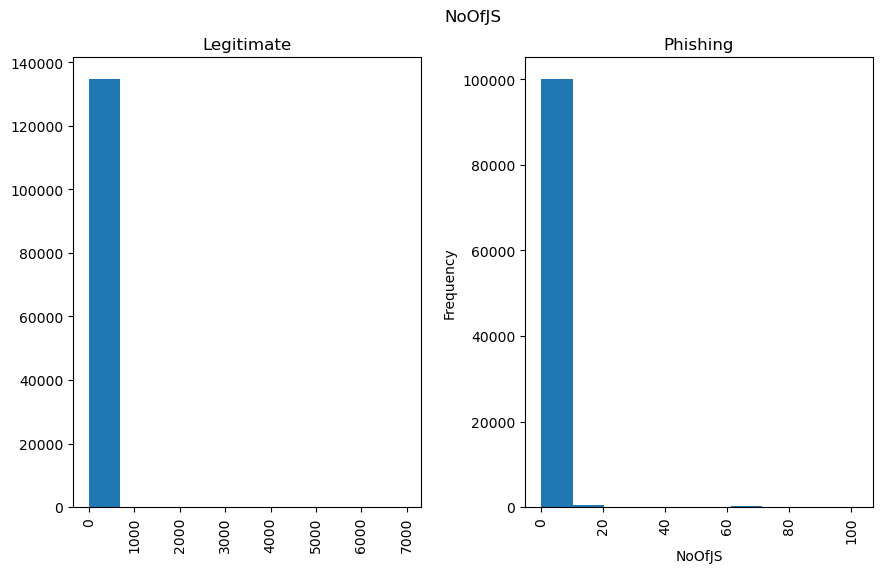

+-------------+---------+-----------+----------+-------+-------+-------+-------+-------+
| LabelName   |   count |      mean |      std |   min |   25% |   50% |   75% |   max |
|-------------+---------+-----------+----------+-------+-------+-------+-------+-------|
| Legitimate  |  134850 | 17.7325   | 27.2139  |     0 |     8 |    14 |    23 |  6957 |
| Phishing    |  100945 |  0.890336 |  3.36297 |     0 |     0 |     0 |     0 |   102 |
+-------------+---------+-----------+----------+-------+-------+-------+-------+-------+


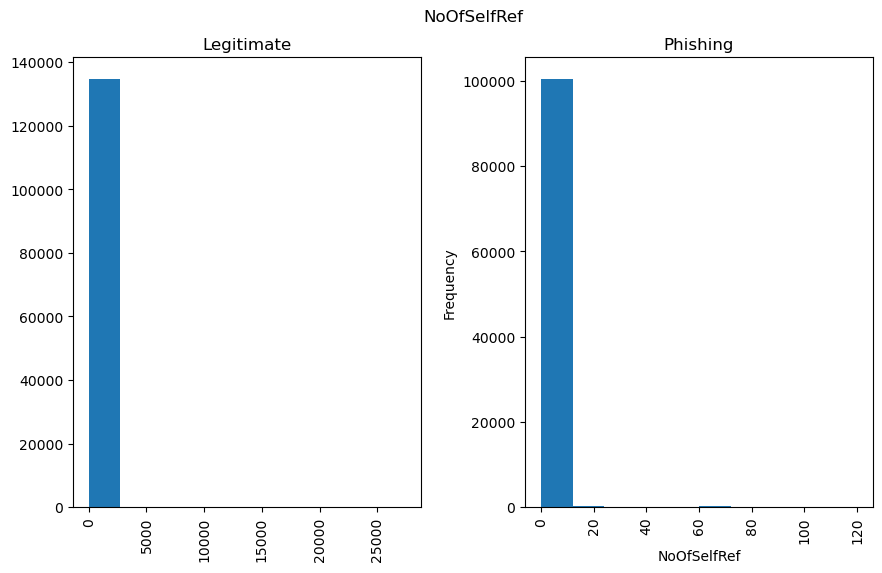

+-------------+---------+------------+-----------+-------+-------+-------+-------+-------+
| LabelName   |   count |       mean |       std |   min |   25% |   50% |   75% |   max |
|-------------+---------+------------+-----------+-------+-------+-------+-------+-------|
| Legitimate  |  134850 | 113.41     | 221.635   |     0 |    35 |    76 |   140 | 27397 |
| Phishing    |  100945 |   0.496032 |   3.16889 |     0 |     0 |     0 |     0 |   120 |
+-------------+---------+------------+-----------+-------+-------+-------+-------+-------+


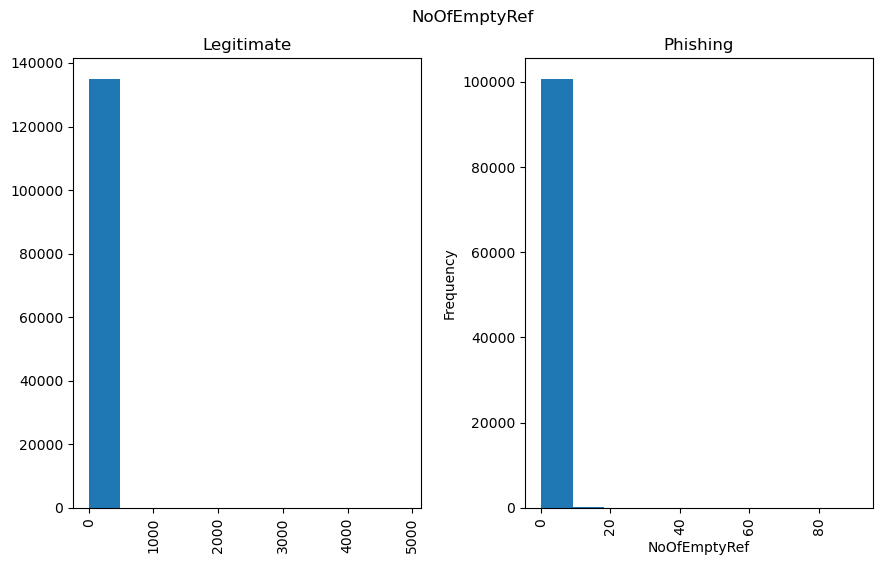

+-------------+---------+----------+----------+-------+-------+-------+-------+-------+
| LabelName   |   count |     mean |      std |   min |   25% |   50% |   75% |   max |
|-------------+---------+----------+----------+-------+-------+-------+-------+-------|
| Legitimate  |  134850 | 4.04489  | 23.1366  |     0 |     0 |     1 |     3 |  4887 |
| Phishing    |  100945 | 0.150379 |  1.78162 |     0 |     0 |     0 |     0 |    91 |
+-------------+---------+----------+----------+-------+-------+-------+-------+-------+


+-------------+---------+----------+-----------+-------+-------+-------+-------+-------+
| LabelName   |   count |     mean |       std |   min |   25% |   50% |   75% |   max |
|-------------+---------+----------+-----------+-------+-------+-------+-------+-------|
| Legitimate  |  134850 | 85.2946  | 205.669   |     0 |    17 |    46 |   106 | 27516 |
| Phishing    |  100945 |  1.12812 |   3.20459 |     0 |     0 |     0 |     1 |   368 |
+-------------+---------+----------+-----------+-------+-------+-------+-------+-------+


In [58]:
# Plot histograms for each hist_column, colored by the label column
pandas_df = pd.read_csv(DATASET_PATH)
# Define the mapping for the labels
label_mapping = {0: 'Phishing', 1: 'Legitimate'}

# Apply the mapping to create a new column for the textual representation
pandas_df['LabelName'] = pandas_df['label'].map(label_mapping)

# Plot histograms for each specified column, grouped by the textual labels
for i, col in enumerate(hist_columns):

    # Plot the histograms grouped by textual labels
    pandas_df.hist(column=col, by='LabelName', figsize=(10, 6), )
    plt.suptitle(col)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.savefig(f'./plots/histograms/{col}.png')
    plt.show()
    
    # save the plot named with the column's name

    # print the table
    print(tabulate(pandas_df.groupby('LabelName')[
          col].describe(), headers='keys', tablefmt='psql'))

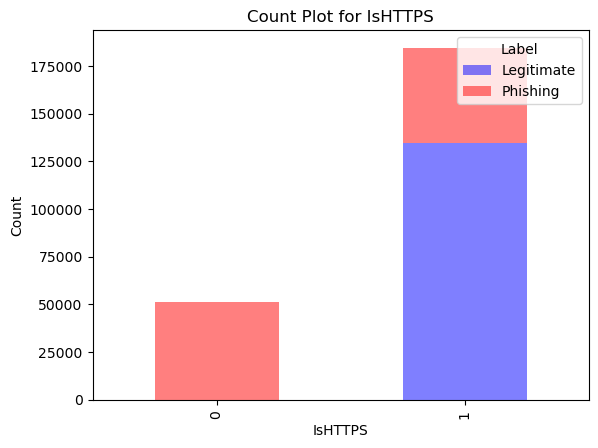

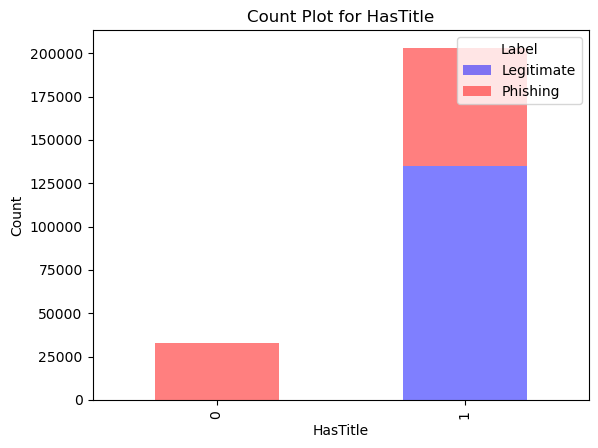

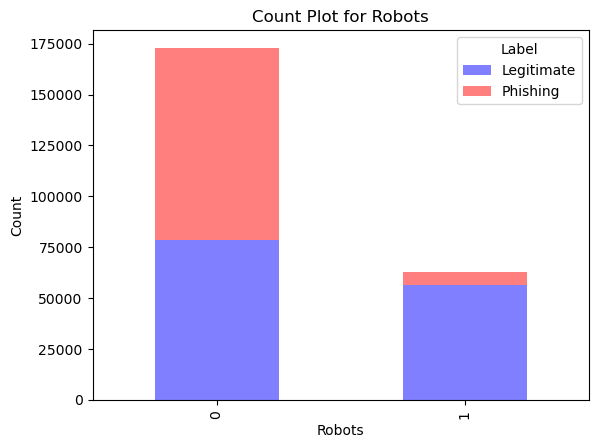

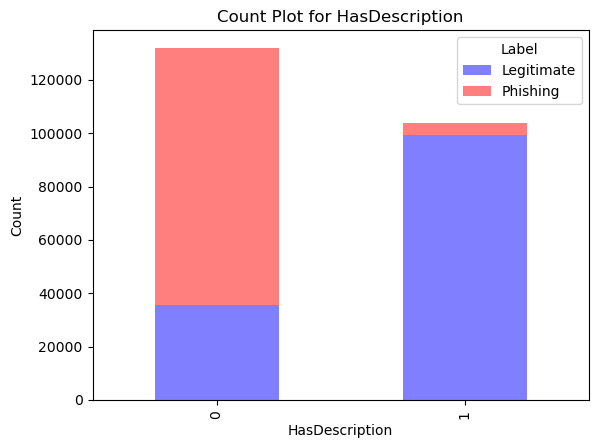

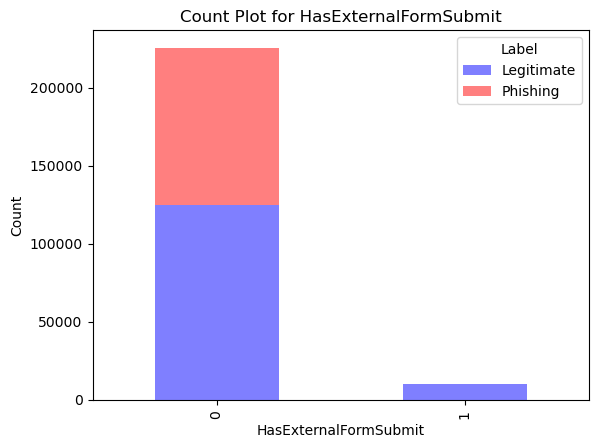

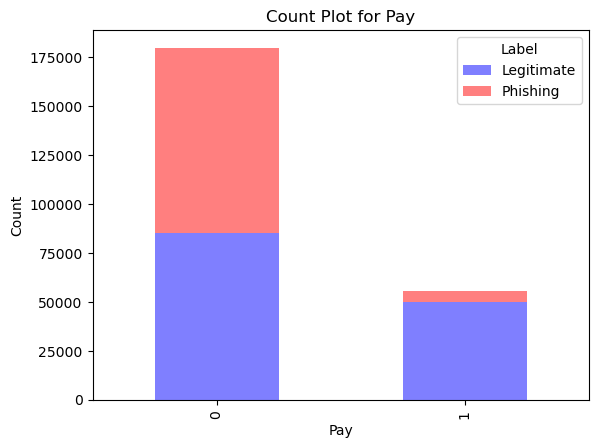

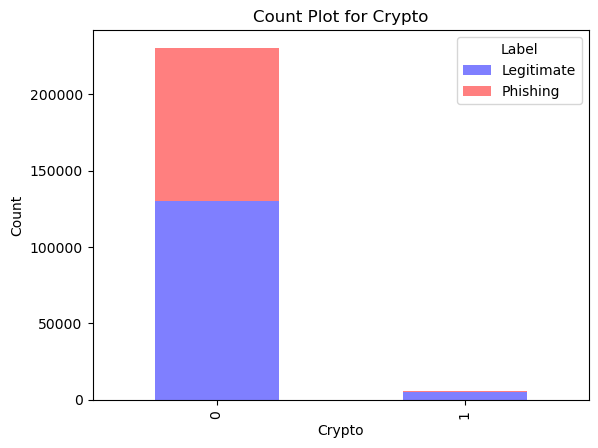

In [59]:

# Plot count plots for each specified binary column, grouped by textual labels
for i, col in enumerate(binary_columns):
    # Restrict the number of plots if needed
    # if i > 0:
    #     break

    # Group by the binary column and the LabelName column to count occurrences
    count_data = pandas_df.groupby(
        [col, 'LabelName']).size().unstack(fill_value=0)

    # Plot the data
    # alpha = 0.5 for colors, colors are blue and red
    count_data.plot(kind='bar', stacked=True, alpha=0.5, color=['blue', 'red'])
    plt.title(f'Count Plot for {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Label', loc='upper right')
    plt.savefig(f'./plots/count/{col}.png')
    plt.show()


In [60]:
# ! correlation matrix, 3la showayet hagat tanya

# !association rules
# !3 models - 1 map reduce

## 3- Model & Training


In [61]:
# drop all columns that are not in hist_columns and binary_columns
df_train = df_train.select(hist_columns + binary_columns + ["label"])
df_test = df_test.select(hist_columns + binary_columns + ["label"])

print(df_train.count())
print(df_test.count())

177041
58329


In [62]:
# get column data types

col_dtypes = [
    df_train.select(col).dtypes[0][1] for col in df_train.columns]
print(col_dtypes)

['int', 'double', 'double', 'double', 'double', 'int', 'double', 'double', 'double', 'int', 'int', 'double', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int']


In [63]:
# # Save as a single CSV file
df_train_pandas = df_train.toPandas()

# print datatypes
print(df_train_pandas.dtypes)

URLLength                  int32
URLSimilarityIndex       float64
CharContinuationRate     float64
TLDLegitimateProb        float64
URLCharProb              float64
NoOfSubDomain              int32
LetterRatioInURL         float64
DegitRatioInURL          float64
SpacialCharRatioInURL    float64
LineOfCode                 int32
LargestLineLength          int32
URLTitleMatchScore       float64
NoOfURLRedirect            int32
NoOfSelfRedirect           int32
NoOfPopup                  int32
NoOfiFrame                 int32
NoOfImage                  int32
NoOfCSS                    int32
NoOfJS                     int32
NoOfSelfRef                int32
NoOfEmptyRef               int32
NoOfExternalRef            int32
IsHTTPS                    int32
HasTitle                   int32
HasFavicon                 int32
Robots                     int32
IsResponsive               int32
HasDescription             int32
HasExternalFormSubmit      int32
HasSocialNet               int32
HasSubmitB

In [64]:
df_train_pandas.to_csv('train.csv', index=False, header=True)

In [65]:
df_test_pandas = df_test.toPandas()
df_test_pandas.to_csv('test.csv',  index=False, header=True)

## 4- Evaluation
